**Step-1**

**Import required packages**

- Package-1: Related to blob

  - pip install azure-storage-blob azure-identity

- Package-2: Related to Azure Document Intelligence serivce

  - pip install azure-ai-formrecognizer


**Step-2**

- Create Azure Document Intelligence service

- Go to azure portal 

- Search for Azure AI services

- Under that we have Document intelligence service

- Create your services

- Once you created , Go to service main page

- We need **keys and endpoint**

In [2]:
#!pip install azure-storage-blob azure-identity

In [4]:
#!pip install azure-ai-formrecognizer

In [5]:
key="ABEcOP9CUTfGtjG00gc8LxDIoMe0nAKjF13QE0tLJOzyEYYP95LyJQQJ99ALACYeBjFXJ3w3AAALACOGZXSy"
end_point="https://ragdocument.cognitiveservices.azure.com/"

In [6]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.formrecognizer import DocumentAnalysisClient
credential = AzureKeyCredential(key)
document_analysis_client = DocumentAnalysisClient(end_point, credential)

**Step-3**

- Imagine the file is uploaded already in storage services

- Connect to the Container

- See your blob(or file avialable)

- Connect to blob and read the image

- Get blob url

In [7]:
from azure.storage.blob import BlobServiceClient
blob_account_url='https://azuraiml.blob.core.windows.net'
storage_credential='08ITVKtPNsAhRvNxEKTqnbSQ1/aCtR0LnhnhONCFLeNvGtV9QT9uxvjwlMU67t5N+iQZ2JL1z0p/+AStCqrpMA=='

blob_service_client=BlobServiceClient(account_url=blob_account_url,
                                      credential=storage_credential)

blob_service_client

In [15]:
all_containers=blob_service_client.list_containers()
list(all_containers)

[{'name': 'cloudcontainer', 'last_modified': datetime.datetime(2024, 11, 26, 17, 11, 59, tzinfo=datetime.timezone.utc), 'etag': '"0x8DD0E3D7016F1E0"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x000001772D5F5940>, 'immutable_storage_with_versioning_enabled': False},
 {'name': 'createcontainer', 'last_modified': datetime.datetime(2024, 11, 26, 19, 3, 5, tzinfo=datetime.timezone.utc), 'etag': '"0x8DD0E4CF556963C"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x000001772D5F5160>, 'immutable

In [18]:
#container_client = blob_service_client.get_container_client('azuraimlcontainer')
#for blob in container_client.list_blobs():
#    print(blob.name)

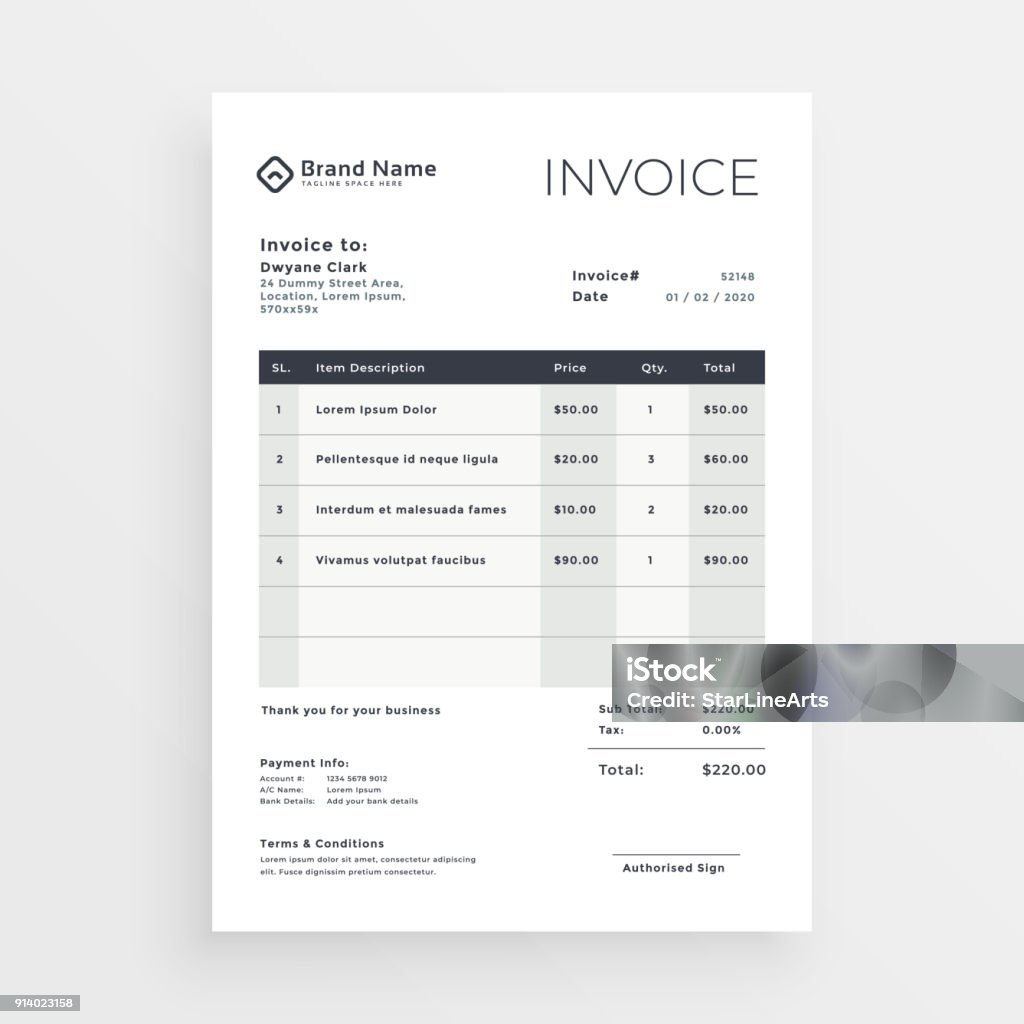

In [19]:
blob_client= blob_service_client.get_blob_client('invoice','Bill.jpg')
data=blob_client.download_blob()
from PIL import Image
image=Image.open(data)
image

**Step-3**

**Using blob url**

In [ ]:
# Initialize Blob Client
from azure.storage.blob import BlobClient
blob_account_url='https://azuraiml.blob.core.windows.net'
storage_credential='08ITVKtPNsAhRvNxEKTqnbSQ1/aCtR0LnhnhONCFLeNvGtV9QT9uxvjwlMU67t5N+iQZ2JL1z0p/+AStCqrpMA=='
blob_url = 'https://azuraiml.blob.core.windows.net/invoice/Bill.jpg'

blob_client = BlobClient.from_blob_url(blob_url=blob_url, credential=storage_credential)

# Download the image invoice from Azure Storage
with open("invoice_image.jpg", "wb") as download_file:
    download_file.write(blob_client.download_blob().readall())

# Analyze the image using Document Intelligence
with open("invoice_image.jpg", "rb") as invoice_image:
    poller = document_analysis_client.begin_analyze_document("prebuilt-invoice", document=invoice_image)
    result = poller.result()

    # Print out the extracted data
    for idx, invoice in enumerate(result.documents):
        print(f"============Recognise Invoice: {idx + 1}===================")
        #for name, field in invoice.fields.items():
            #print(f"{name}: {field.value}")
        for i in invoice.fields:
            print(i)
            print(f"{i}:{invoice.fields[i].value}")


============Recognise Invoice: 1===================
CustomerAddress
CustomerAddress:AddressValue(house_number=24, po_box=None, road=None, city=None, state=None, postal_code=None, country_region=None, street_address=24, unit=None, city_district=None, state_district=None, suburb=None, house=Dummy Street Area,
Location, Lorem Ipsum.
570xx59x, level=None)
CustomerAddressRecipient
CustomerAddressRecipient:Dwyane Clark
CustomerName
CustomerName:Dwyane Clark
InvoiceDate
InvoiceDate:2020-01-02
InvoiceId
InvoiceId:52148
InvoiceTotal
InvoiceTotal:$220.0
Items
Items:[DocumentField(value_type=dictionary, value={'Amount': DocumentField(value_type=currency, value=CurrencyValue(amount=50.0, symbol=$, code=USD), content=$50.00, bounding_regions=[BoundingRegion(page_number=1, polygon=[Point(x=703.0, y=404.0), Point(x=746.0, y=404.0), Point(x=746.0, y=415.0), Point(x=704.0, y=415.0)])], spans=[DocumentSpan(offset=219, length=6)], confidence=0.922), 'Description': DocumentField(value_type=string, value='

In [21]:
for idx, invoice in enumerate(result.documents):
    print(f"============Recognise Invoice: {idx + 1}===================")
    for i in invoice.fields:
        if i=='Items':
            value=invoice.fields[i].value[0].value['Amount'].value
            item=invoice.fields[i].value[0].value['Description'].value
            print(f"{item} has {value}")

============Recognise Invoice: 1===================
Lorem Ipsum Dolor has $50.0


In [22]:
for idx, invoice in enumerate(result.documents):
    print(f"============Recognise Invoice: {idx + 1}===================")
    for i in invoice.fields:
        if i=='Items':
            print(len(invoice.fields[i].value))
            

============Recognise Invoice: 1===================
4


In [23]:
for idx, invoice in enumerate(result.documents):
    print(f"============Recognise Invoice: {idx + 1}===================")
    for i in invoice.fields:
        if i=='Items':
            for element in range(len(invoice.fields[i].value)):
                value=invoice.fields[i].value[element].value['Amount'].value
                item=invoice.fields[i].value[element].value['Description'].value
                print(f"{item} has {value}")
        if i!='Items':
             print(f"{i}:{invoice.fields[i].value}")

============Recognise Invoice: 1===================
CustomerAddress:AddressValue(house_number=24, po_box=None, road=None, city=None, state=None, postal_code=None, country_region=None, street_address=24, unit=None, city_district=None, state_district=None, suburb=None, house=Dummy Street Area,
Location, Lorem Ipsum.
570xx59x, level=None)
CustomerAddressRecipient:Dwyane Clark
CustomerName:Dwyane Clark
InvoiceDate:2020-01-02
InvoiceId:52148
InvoiceTotal:$220.0
Lorem Ipsum Dolor has $50.0
Pellentesque id neque ligula has $60.0
Interdum et malesuada fames has $20.0
Vivamus volutpat faucibus has $90.0
